<a href="https://colab.research.google.com/github/Hannah-OA0/A-colab-study/blob/main/Final_HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#資料表
#https://github.com/neelk07/neelkothari/tree/master/blog/static/data/text  文本下載位置
#常用咒語
#Lumos（路摸思） Expecto Patronum（疾疾，護法現身）
#Expelliarmus（去去武器走）
#Avada Kedavra（索命咒）

#建議製表前先確認前處理 (文件檔名.大小寫.空格等)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls"/content/drive/MyDrive/HP文本"

' Chamber of Secrets.txt'  ' Half-Blood Prince.txt'    "Sorcerer's Stone.txt"
'Deathly Hallows.txt'      'Order of the Phoenix.txt'
' Goblet of Fire.txt'      'Prisoner of Azkaban.txt'


In [ ]:
import nltk

nltk.download("popular")
nltk.download("all-corpora")
nltk.download("punkt")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root= '/content/drive/MyDrive/HP文本'
wordlists=PlaintextCorpusReader(corpus_root,'.*')

books = wordlists.fileids()
print(books)

[' Chamber of Secrets.txt', ' Goblet of Fire.txt', ' Half-Blood Prince.txt', 'Deathly Hallows.txt', 'Order of the Phoenix.txt', 'Prisoner of Azkaban.txt', "Sorcerer's Stone.txt"]


In [ ]:
from threading import Condition
books= wordlists.fileids()

cfd = nltk.ConditionalFreqDist((fileid,word)
   for fileid in books
   for word in wordlists.words(fileid)

    )
findlist=["Legilimens","Avada","Expelliarmus"]
#兩段式咒語會被視為兩個不同的單字,可以在前處理中去空格,或直接以咒語第一段搜尋
cfd.tabulate(Conditions=books,samples=findlist)

                           Legilimens        Avada Expelliarmus 
  Chamber of Secrets.txt            0            0            3 
      Goblet of Fire.txt            0            9            3 
   Half-Blood Prince.txt            1            3            2 
     Deathly Hallows.txt            0            8            8 
Order of the Phoenix.txt            6            3            6 
 Prisoner of Azkaban.txt            0            0            4 
    Sorcerer's Stone.txt            0            0            0 


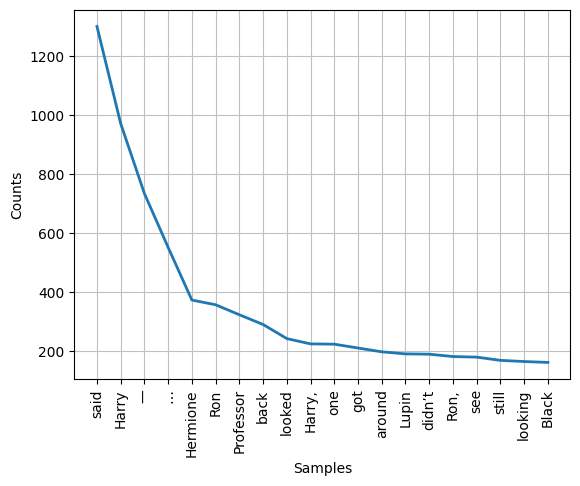

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
import nltk
from wordcloud import STOPWORDS

dataset = wordlists.raw('Prisoner of Azkaban.txt')

tokens = dataset.split(' ')
clean_tokens = tokens[:]

for token in tokens:
  if token.lower() in STOPWORDS:
    clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)

# for key,val in freq.items():
#  print (str(key) + ':' + str(val))
freq.plot(20,cumulative=False)

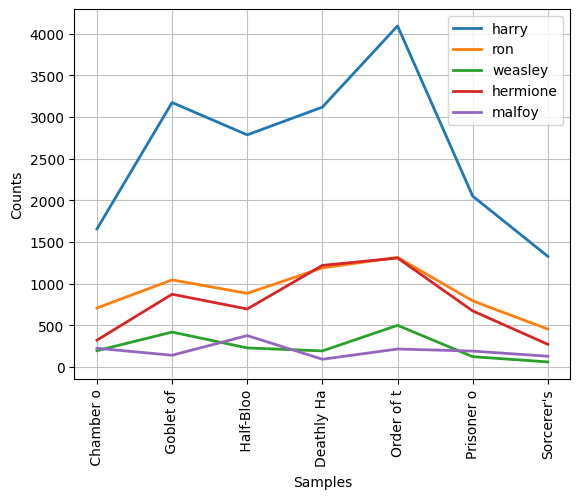

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:10]) # 表格下方顯示txt檔名前10個字
           for fileid in wordlists.fileids()
           for w in wordlists.words(fileid)
           #List裡面請改成你要搜尋的字詞
           for target in ['harry', 'hermione','ron','malfoy','weasley' ]
           if w.lower().startswith(target))
cfd.plot()

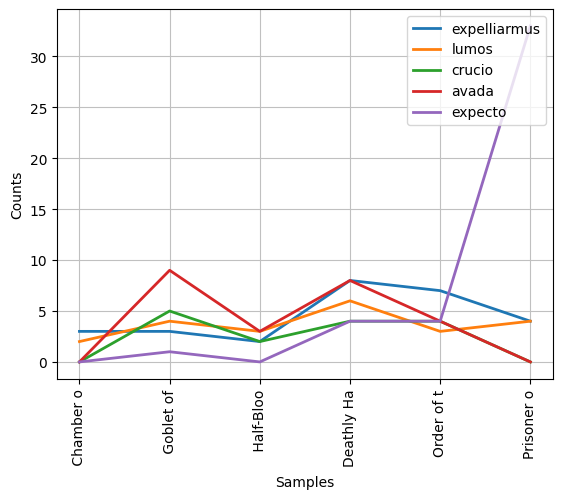

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:10])
           for fileid in wordlists.fileids()
           for w in wordlists.words(fileid)

           for target in ['lumos','avada','crucio','expecto','expelliarmus' ]
           if w.lower().startswith(target))
cfd.plot()  #咒語版